##TableNet:
###Deep Learning model for end-to-end Table detection and Tabular data extraction from Scanned Document Images

<h1>1.1 Business/Real-world Problem</h1>

With the wide usage of mobile phones and electronic devices in taking photograph of the documents such as Insurance claims, financial invoices etc., and uploading these documents it has become essential in detecting the underlying table and tabular information accurately in an automated fashion in order to reduce the human errors which easily occurs to manual processing of these documents and to reduce the labour costs. TableNet model performs both the tasks of detecting the table in the document and also the table structure togetherly via an end-to-end single model.

<h2>1.2. Problem Statement</h2>

To detect the table present in the document and if present detect the tabular structure from which we extract the table information.

<h2>1.3. Source</h2>


We train our model on the Marmot dataset in which we have annotations for the table mask and table coulmns mask. 
Data Source: https://drive.google.com/drive/folders/1QZiv5RKe3xlOBdTzuTVuYRxixemVIODp

<h2> 1.4. Business objectives and constraints. </h2>

*   No strict low latency as we need to extract the information form the tables can take few seconds.
*   Cost of making errors is high i.e., information extraction need to be accurate.
*   Interpretability has no significance in this case.





<h1> 2. Deep Learning Problem </h1> 

<h2> 2.1. Data </h2> 

<h3> 2.1.1. Data Overview </h3>

The Marmot dataset contains 509 document images in bmp format in which each image contains table. But for only 494 images the annotation of the table and table columns/rows is present in xml format. 

<h2> 2.2. Mapping the real-world problem to an DL problem </h2>

<h3> 2.2.1. Type of Deep Learning Problem </h3>

The problem we are solving is table detection and table information extraction if a table exists i.e., we can frame it as Classification problem in which we are performing the task of predicting whether table exists or not.

<h3>2.2.2. Performance Metric</h3>

We use classification metrics Precision, Recall, F1-Score as our performance metrics for our model.

<h2>2.3. Useful Links </h2>

*   https://arxiv.org/pdf/2001.01469.pdf



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
%pwd

'/content/drive/MyDrive'

In [ ]:
mkdir Marmot_data

In [ ]:
cd Marmot_data/

/content/drive/My Drive/Marmot_data


In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1Ms3h7oNoWZxR0nnW_1D_Vq9F254wqSXp&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1Ms3h7oNoWZxR0nnW_1D_Vq9F254wqSXp
To: /content/drive/My Drive/Marmot_data/Marmot_data.zip
68.8MB [00:01, 54.4MB/s]


In [ ]:
!unzip Marmot_data.zip

<h1> 3. Exploratory Data Analysis </h1>

In [ ]:
pip install xmltodict

In [ ]:
#importing all the necessary libraries
import os
import cv2
import json
import math
import csv
import random
import pathlib
import xmltodict
from PIL import Image,ImageDraw
import xml.dom.minidom
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xml.etree.ElementTree as ET
import tensorflow as tf
from numpy.random import seed
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cd /content/drive/My Drive/Marmot_data

/content/drive/My Drive/Marmot_data


<h3>3.1. Number of data points/images in Marmot dataset</h3>

In [ ]:
#https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python
print('Number of data points in Marmot dataset: ',len([name for name in os.listdir('.') if os.path.isfile(name)]))

Number of data points in Marmot dataset:  1008


In [ ]:
print('Number of document images in Marmot dataset: ',len([name for name in os.listdir('.')  if name.endswith('.bmp')]))

Number of document images in Marmot dataset:  509


In [ ]:
print('Number of document images in Marmot dataset for which annotations is present: ',len([name for name in os.listdir('.')  if name.endswith('.xml')]))

Number of document images in Marmot dataset for which annotations is present:  495


<h3>Observations</>

*   We observe that Marmot dataset English document images in bmp format with annotations in xml format.
*   This dataset dataset contains 509 document images and annotations of table and table structure(rows and columns) for 495 document images.
*   The dataset contains annotations of ground truth values for both the table and table structure unlike the original Marmot dataset containing annotations with only the ground truth for table detection.


In [ ]:
%pwd

'/content/drive/My Drive/Marmot_data'

<h3>3.2. Loading random image data and its annotation</h3>

size of the image is:  (1056, 816)


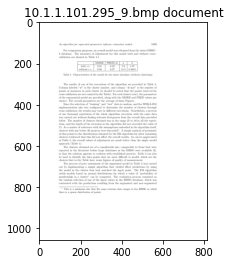

In [ ]:
random.seed(42)
image_name = random.choice([file_name for file_name in os.listdir('/content/drive/My Drive/Marmot_data') if file_name.endswith('.bmp')])
img = cv2.imread(image_name)
height, width = img.shape[:2]
plt.title(image_name + ' document')
plt.imshow(img)
print('size of the image is: ',(height, width))

In [ ]:
dom = xml.dom.minidom.parse(image_name.replace('bmp','xml'))
pretty_xml_as_string = dom.toprettyxml()
print(pretty_xml_as_string)

<?xml version="1.0" ?>
<annotation>
	
	
	<folder>MARMOT_ANNOTATION</folder>
	
	
	<filename>10.1.1.101.295_9.bmp</filename>
	
	
	<path>/home/monika/Desktop/MARMOT_ANNOTATION/10.1.1.101.295_9.bmp</path>
	
	
	<source>
		
		
		<database>Unknown</database>
		
	
	</source>
	
	
	<size>
		
		
		<width>816</width>
		
		
		<height>1056</height>
		
		
		<depth>1</depth>
		
	
	</size>
	
	
	<segmented>0</segmented>
	
	
	<object>
		
		
		<name>column</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>193</xmin>
			
			
			<ymin>191</ymin>
			
			
			<xmax>252</xmax>
			
			
			<ymax>239</ymax>
			
		
		</bndbox>
		
	
	</object>
	
	
	<object>
		
		
		<name>column</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>271</xmin>
			
			
			<ymin>191</ymin>
			
			
			<xmax>312</xmax>
			
			
			<ymax>238</ymax>
			
		
		</bndbox>


<h3>3.3. Annotation of the table coordinates and mapping to Images </h3>

In [ ]:
# this function will take a xml file name as argument converts into json file and returns width, height, table co-ordinates(alongg with the column co-ordinates)
def get_annot(file):
    #loading xml file
    #reference: https://www.geeksforgeeks.org/python-xml-to-json/

    with open(file) as xml_file:
        data_dict = xmltodict.parse(xml_file.read())
        xml_file.close()

        #converting to json
        json_data = json.dumps(data_dict)

        #loading json file
        with open("data.json", "w") as json_file:
            json_file.write(json_data)
            json_dict = json.loads(json_data)
            json_file.close()

    # width of the image
    w = json_dict['annotation']['size']['width']
    # height of the image
    h = json_dict['annotation']['size']['height']

    #getting co-ordinates of table columns
    xmin_lst = []
    ymin_lst = []
    xmax_lst = []
    ymax_lst = []
    for i in json_dict['annotation']['object']:
        if i['bndbox']:
            xmin_lst.append(int(i['bndbox']['xmin']))
            xmax_lst.append(int(i['bndbox']['xmax']))
            ymin_lst.append(int(i['bndbox']['ymin']))
            ymax_lst.append(int(i['bndbox']['ymax']))   
    return w, h, xmin_lst, ymin_lst,xmax_lst,ymax_lst

In [ ]:
#here we are calling the get_annot function for each of the xml file for which its corresponding image is present and storing the returned values into dataframe
doc_img = []
doc_ann = []
xmin_l  = []
xmax_l  = []
ymin_l  = []
ymax_l  = []
width_l = []
height_l = []
data_marmot = pd.DataFrame()

for i,doc in enumerate(tqdm(sorted(os.listdir('/content/drive/My Drive/Marmot_data')))): #for each file
    if doc.endswith('.xml'): #checking if xml file
        if os.path.isfile(doc.replace('xml','bmp')): #getting it's image & checking if it's present
            doc_img.append(doc.replace('xml','bmp'))
            doc_ann.append(doc)
            w, h, xmin_lst, ymin_lst, xmax_lst, ymax_lst = get_annot(doc) #getting the values returned from get_annot function
            xmin_l.append(xmin_lst)
            xmax_l.append(xmax_lst)
            ymin_l.append(ymin_lst)
            ymax_l.append(ymax_lst)
            width_l.append(w)
            height_l.append(h)
#storing all the annotations of each corresponding image where they are mapped to get table mask and column mask
data_marmot['image'] = doc_img
data_marmot['annotation'] = doc_ann
data_marmot['width']  = width_l
data_marmot['height']  = height_l
data_marmot['xmin'] = xmin_l
data_marmot['xmax'] = xmax_l
data_marmot['ymin'] = ymin_l
data_marmot['ymax'] = ymax_l

100%|██████████| 1014/1014 [03:02<00:00,  5.56it/s]


In [ ]:
data_marmot.head()

image  ...                                               ymax
0   10.1.1.1.2006_3.bmp  ...                               [785, 783, 785, 784]
1  10.1.1.1.2013_63.bmp  ...                [766, 764, 764, 764, 764, 763, 764]
2  10.1.1.1.2013_64.bmp  ...  [332, 330, 329, 330, 329, 652, 649, 651, 652, ...
3   10.1.1.1.2014_4.bmp  ...                                         [689, 689]
4   10.1.1.1.2014_6.bmp  ...                                    [355, 354, 355]

[5 rows x 8 columns]

In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
data_marmot.to_csv('data_marmot.csv',index=False)

In [ ]:
data_marmot = pd.read_csv('data_marmot.csv')
data_marmot.head()

image  ...                                               ymax
0   10.1.1.1.2006_3.bmp  ...                               [785, 783, 785, 784]
1  10.1.1.1.2013_63.bmp  ...                [766, 764, 764, 764, 764, 763, 764]
2  10.1.1.1.2013_64.bmp  ...  [332, 330, 329, 330, 329, 652, 649, 651, 652, ...
3   10.1.1.1.2014_4.bmp  ...                                         [689, 689]
4   10.1.1.1.2014_6.bmp  ...                                    [355, 354, 355]

[5 rows x 8 columns]

In [ ]:
cd Marmot_data/

/content/drive/My Drive/Marmot_data


<h3>3.4. Checking if annotation of the table coordinates and mapping to Images is performed correctly </h3>

Original size of image height and width is:  (1123, 793)
Resized size of image height and width is:  (1024, 1024)


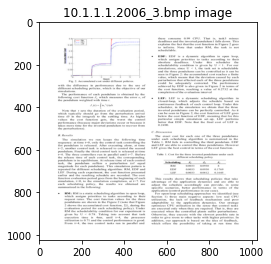

In [ ]:
img = cv2.imread(data_marmot.iloc[0]['image'])
print('Original size of image height and width is: ',img.shape[:2])
#resizing the original image since the proposed model uses fixed size of input image to be of 1024 x 1024
res_img = cv2.resize(img, (1024,1024))
plt.title(data_marmot.iloc[0]['image']+' image')
plt.imshow(res_img)
print('Resized size of image height and width is: ',res_img.shape[:2])

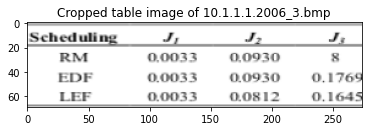

In [ ]:
#here we are getting the cropped table image present in the document
min_x = min([int(i) for i in data_marmot['xmin'][0][1:-1].split(',')]) #starting x co-ordinate
#resizing the x co-ordinate since we have co-ordinate for original size and we have resized to 1024 x 1024 
min_x = round((1024/img.shape[1]) * min_x)
max_x = max([int(i) for i in data_marmot['xmax'][0][1:-1].split(',')]) #ending x co-ordinate
#resizing the x co-ordinate since we have co-ordinate for original size and we have resized to 1024 x 1024
max_x = round((1024/img.shape[1]) * max_x) 
min_y = min([int(i) for i in data_marmot['ymin'][0][1:-1].split(',')]) #starting y co-ordinate
#resizing the y co-ordinate since we have co-ordinate for original size and we have resized to 1024 x 1024 
min_y = round((1024/img.shape[0]) * min_y)
max_y = max([int(i) for i in data_marmot['ymax'][0][1:-1].split(',')]) #ending y co-ordinate
#resizing the y co-ordinate since we have co-ordinate for original size and we have resized to 1024 x 1024
max_y = round((1024/img.shape[0]) * max_y)
crop_img = res_img[min_y:max_y, min_x:max_x].copy()
plt.title('Cropped table image of '+data_marmot.iloc[0]['image'])
plt.imshow(crop_img)

<h3>Observations:</h3>

*   We observe that from xml file with annotation corresponding to the table co-ordinates, the table can be mapped in the document as seen above.
*   We have cropped the table image from the document containing that table..



<h3>3.5. Generating the corresponding table and table-column masks </h3>

In [ ]:
#initializing the table and table-column masks
table_mask = np.zeros((1024, 1024), dtype=np.int32)
column_mask = np.zeros((1024, 1024), dtype=np.int32)
#table mask based on the modified co-ordinates
table_mask[min_y:max_y, min_x:max_x] = 255

In [ ]:
#getting the co-ordinates of the table-column mask and modifying the co-ordinates corresponding to 1024 x 1024 size
col_mask_dict = {}
for i in range(1):
    for col in data_marmot.columns[4:8]:
        col_mask_dict[col] = [int(j) for j in data_marmot[col][i][1:-1].split(',')]
    col_mask_dict['width'] = data_marmot['width'][i]
    col_mask_dict['height'] = data_marmot['height'][i]

In [ ]:
for k in range(0,len(col_mask_dict['xmin'])):
    #table-column mask based on the modified co-ordinates
    column_mask[round((1024/col_mask_dict['height']) * col_mask_dict['ymin'][k]):round((1024/col_mask_dict['height']) * col_mask_dict['ymax'][k]),round((1024/col_mask_dict['width']) * col_mask_dict['xmin'][k]):round((1024/col_mask_dict['width']) * col_mask_dict['xmax'][k])] = 255
im_col = Image.fromarray(column_mask.astype(np.uint8),'L')
im_table = Image.fromarray(table_mask.astype(np.uint8),'L')

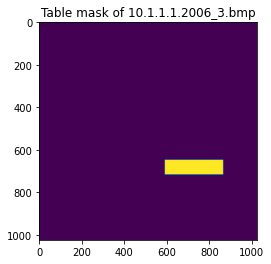

In [ ]:
plt.title('Table mask of '+data_marmot.iloc[0]['image'])
plt.imshow(im_table)

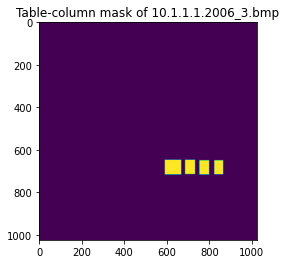

In [ ]:
plt.title('Table-column mask of '+data_marmot.iloc[0]['image'])
plt.imshow(im_col)

<h3>Observations: </h3>

*   We observe that with sucessfully mapping the co-ordinates of the table from the xml file corresponding to each image, created the table, table-column segmented masks.



<h3>3.6. Generating table and table-column masks using the corresponding annotations with their co-ordinates and saving them. </h3>

In [ ]:
root_dir = os.getcwd()

In [ ]:
#this method takes data_marmot dataframe and returns the data_marmot dataframe with additional columns of the paths to the table mask/table-column mask/resized images 
def compute_masks(data_marmot):
    table_save_l =  []
    col_save_l =  []
    resize_image_l = []

    #creating three directories
    op_dir_1 = 'table_mask'
    op_dir_2 = 'column_mask'
    op_dir_3 = 'resize_image'

    #checking if laready these three directories are present and creating them
    if not os.path.exists(root_dir+op_dir_1):
      path = os.path.join(root_dir, op_dir_1)
      os.mkdir(path)

    if not os.path.exists(root_dir+op_dir_2):
      path = os.path.join(root_dir, op_dir_2)
      os.mkdir(path)

    if not os.path.exists(root_dir+op_dir_3):
      path = os.path.join(root_dir, op_dir_3)
      os.mkdir(path)

    for row in tqdm(range(len(data_marmot))): #for each row in the dataframe
        #getting the original image
        img = cv2.imread(data_marmot.iloc[row]['image'])
        #resizing the original image to 1024 x 1024
        res_img = cv2.resize(img, (1024,1024))

        #getting the co-ordinates of the table mask and modifying the co-ordinates corresponding to 1024 x 1024 size
        min_x = min([int(i) for i in data_marmot['xmin'][row][1:-1].split(',')])
        min_x = round((1024/img.shape[1]) * min_x)
        max_x = max([int(i) for i in data_marmot['xmax'][row][1:-1].split(',')])
        max_x = round((1024/img.shape[1]) * max_x)
        min_y = min([int(i) for i in data_marmot['ymin'][row][1:-1].split(',')])
        min_y = round((1024/img.shape[0]) * min_y)
        max_y = max([int(i) for i in data_marmot['ymax'][row][1:-1].split(',')])
        max_y = round((1024/img.shape[0]) * max_y)
        crop_img = res_img[min_y:max_y, min_x:max_x].copy()

        #initializing the table and table-column masks
        table_mask = np.zeros((1024, 1024), dtype=np.int32)
        column_mask = np.zeros((1024, 1024), dtype=np.int32)

        #table mask based on the modified co-ordinates
        table_mask[min_y:max_y, min_x:max_x] = 255

        #getting the co-ordinates of the table-column mask and modifying the co-ordinates corresponding to 1024 x 1024 size
        col_mask_dict = {}
        for col in data_marmot.columns[4:8]:
            col_mask_dict[col] = [int(j) for j in data_marmot[col][row][1:-1].split(',')]

        #getting the width and height of original image
        col_mask_dict['width'] = data_marmot['width'][row]
        col_mask_dict['height'] = data_marmot['height'][row]

        for k in range(0,len(col_mask_dict['xmin'])):
            #table-column mask based on the modified co-ordinates
            column_mask[round((1024/col_mask_dict['height']) * col_mask_dict['ymin'][k]):round((1024/col_mask_dict['height']) * col_mask_dict['ymax'][k]),round((1024/col_mask_dict['width']) * col_mask_dict['xmin'][k]):round((1024/col_mask_dict['width']) * col_mask_dict['xmax'][k])] = 255
        
        #genertaing table mask
        im_col = Image.fromarray(column_mask.astype(np.uint8),'L')
        #genertaing table-column mask
        im_table = Image.fromarray(table_mask.astype(np.uint8),'L')

        table_save_jpeg = data_marmot.iloc[row]['image'].replace('.bmp','_table_mask')+'.jpeg'
        col_save_jpeg = data_marmot.iloc[row]['image'].replace('.bmp','_col_mask')+'.jpeg'
        resize_save = data_marmot.iloc[row]['image'].replace('.bmp','_resized')+'.jpeg'

        #saving the table, table-column, resized images
        im_table.save('/content/drive/My Drive/Marmot_data/table_mask/'+table_save_jpeg)
        im_col.save('/content/drive/My Drive/Marmot_data/column_mask/'+col_save_jpeg)
        cv2.imwrite('/content/drive/My Drive/Marmot_data/resize_image/'+resize_save,res_img)

        table_save_l.append('table_mask/'+table_save_jpeg)
        col_save_l.append('column_mask/'+col_save_jpeg)
        resize_image_l.append('resize_image/'+resize_save)

    data_marmot['table_mask'] = table_save_l
    data_marmot['column_mask'] = col_save_l
    data_marmot['resize_image'] = resize_image_l

    return data_marmot #returning dataframe with the additional columns with paths of table mask, table-column, resized image

In [ ]:
data_marmot = compute_masks(data_marmot)
data_marmot.head()

100%|██████████| 494/494 [08:48<00:00,  1.07s/it]


image  ...                                resize_image
0   10.1.1.1.2006_3.bmp  ...   resize_image/10.1.1.1.2006_3_resized.jpeg
1  10.1.1.1.2013_63.bmp  ...  resize_image/10.1.1.1.2013_63_resized.jpeg
2  10.1.1.1.2013_64.bmp  ...  resize_image/10.1.1.1.2013_64_resized.jpeg
3   10.1.1.1.2014_4.bmp  ...   resize_image/10.1.1.1.2014_4_resized.jpeg
4   10.1.1.1.2014_6.bmp  ...   resize_image/10.1.1.1.2014_6_resized.jpeg

[5 rows x 11 columns]

In [ ]:
%pwd

'/content/drive/My Drive/Marmot_data'

<h3>3.7. Checking the original images with their table mask and table-column masks. </h3>

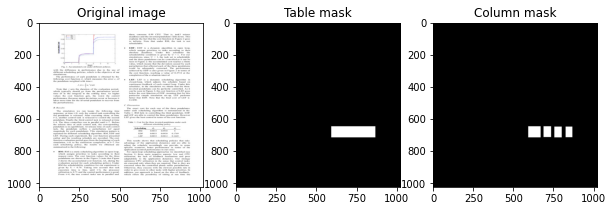

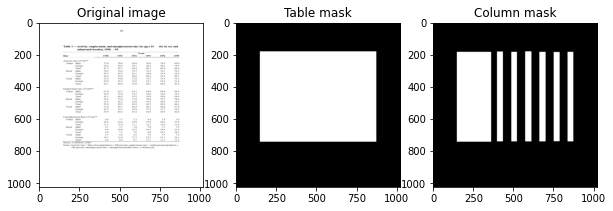

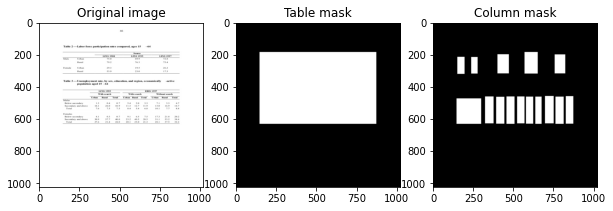

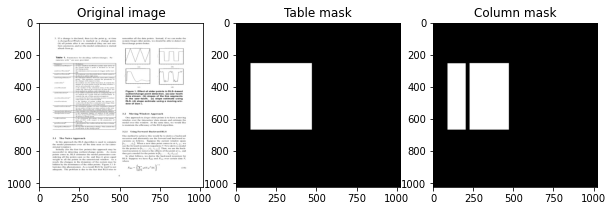

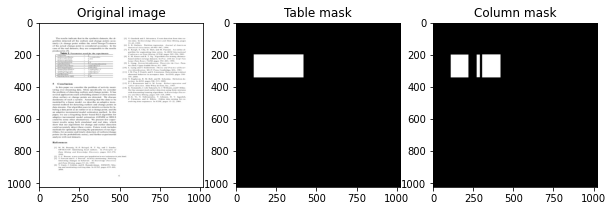

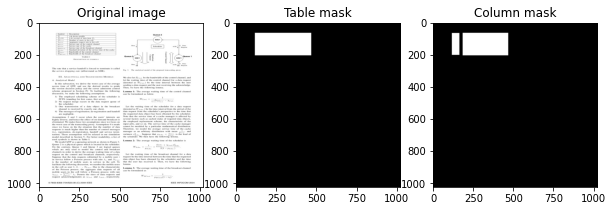

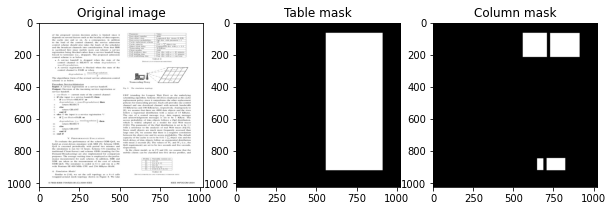

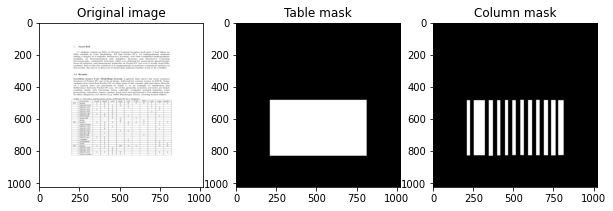

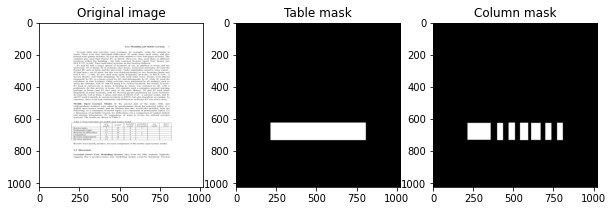

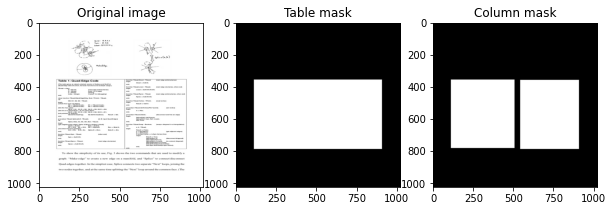

In [ ]:
for i in range(10):
    org_image = cv2.imread(data_marmot.iloc[i]['resize_image'])
    table_mask = cv2.imread(data_marmot.iloc[i]['table_mask'])
    col_mask = cv2.imread(data_marmot.iloc[i]['column_mask'])

    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(org_image)
    plt.title('Original image')
   
    plt.subplot(132)
    plt.imshow(table_mask)
    plt.title('Table mask')

    plt.subplot(133)
    plt.imshow(col_mask)
    plt.title('Column mask')
    plt.show()

In [ ]:
data_marmot.to_csv('data_marmot_with_masks_512.csv',index=False)

<h3>Observations:</h3>

*   With the annotations corresponding to the co-ordinates of table and table-column we generated the respective table and table-column masks of each document image.
*   Saved each of the resized image, table mask and table-column mask in seperate folders under resize_image, table_mask, column_mask respectively.



In [ ]:
data_marmot = pd.read_csv('data_marmot_with_masks_512.csv')
data_marmot.head()

image  ...                                resize_image_512
0   10.1.1.1.2006_3.bmp  ...   resize_image_512/10.1.1.1.2006_3_resized.jpeg
1  10.1.1.1.2013_63.bmp  ...  resize_image_512/10.1.1.1.2013_63_resized.jpeg
2  10.1.1.1.2013_64.bmp  ...  resize_image_512/10.1.1.1.2013_64_resized.jpeg
3   10.1.1.1.2014_4.bmp  ...   resize_image_512/10.1.1.1.2014_4_resized.jpeg
4   10.1.1.1.2014_6.bmp  ...   resize_image_512/10.1.1.1.2014_6_resized.jpeg

[5 rows x 11 columns]

<h3>Copying all the pre-processed document images, table masks and tabble masks into pre_Marmot_data_512 directory</h3>

In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
mkdir pre_Marmot_data

In [ ]:
cd pre_Marmot_data

/content/drive/My Drive/pre_Marmot_data


In [ ]:
cp -R /content/drive/My\ Drive/Marmot_data/resize_image/ /content/drive/My\ Drive/pre_Marmot_data/

In [ ]:
cp -R /content/drive/My\ Drive/Marmot_data/table_mask/ /content/drive/My\ Drive/pre_Marmot_data/

In [ ]:
cp -R /content/drive/My\ Drive/Marmot_data/column_mask/ /content/drive/My\ Drive/pre_Marmot_data/

In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
%pwd

'/content/drive/MyDrive'

<h3>Preparing the train and test data using tf.data</h3>

In [ ]:
dir_path = 'pre_Marmot_data'
data_root = pathlib.Path(dir_path)
print(data_root)

pre_Marmot_data


In [ ]:
for i in os.listdir(dir_path):
    print("No of data_points in ",i," sub-directory is ",len(os.listdir(os.path.join(dir_path,i))))

No of data_points in  resize_image  sub-directory is  494
No of data_points in  table_mask  sub-directory is  494
No of data_points in  column_mask  sub-directory is  494


In [ ]:
list(data_root.iterdir())

[PosixPath('pre_Marmot_data/resize_image'),
 PosixPath('pre_Marmot_data/table_mask'),
 PosixPath('pre_Marmot_data/column_mask')]

In [ ]:
##Getting all image paths
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
# ##shuffling the images 
# random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

1482

In [ ]:
resized_paths = []
table_mask_paths = []
col_mask_paths = []
for path in all_image_paths:
    if path.endswith('resized.jpeg'):
        resized_paths.append(path)
    if path.endswith('table_mask.jpeg'):
        table_mask_paths.append(path)
    if path.endswith('col_mask.jpeg'):
        col_mask_paths.append(path)

In [ ]:
len(resized_paths), len(table_mask_paths), len(col_mask_paths)

(494, 494, 494)

In [ ]:
test_resize_paths = resized_paths[-math.ceil(len(resized_paths)*0.1):]
train_resize_paths = resized_paths[:-math.ceil(len(resized_paths)*0.1)]

test_table_mask_paths = table_mask_paths[-math.ceil(len(table_mask_paths)*0.1):]
train_table_mask_paths = table_mask_paths[:-math.ceil(len(table_mask_paths)*0.1)]

test_col_mask_paths = col_mask_paths[-math.ceil(len(col_mask_paths)*0.1):]
train_col_mask_paths = col_mask_paths[:-math.ceil(len(col_mask_paths)*0.1)]

In [ ]:
(len(train_resize_paths), len(test_resize_paths)), (len(train_table_mask_paths),len(test_table_mask_paths)), (len(train_col_mask_paths),len(test_col_mask_paths))

((444, 50), (444, 50), (444, 50))

In [ ]:
#saving the paths of train and test datapoints 
import pickle

with open('train_resize_paths.pkl', 'wb') as f:
    pickle.dump(train_resize_paths, f)

with open('train_table_mask_paths.pkl', 'wb') as f:
    pickle.dump(train_table_mask_paths, f)

with open('train_col_mask_paths.pkl', 'wb') as f:
    pickle.dump(train_col_mask_paths, f)

with open('test_resize_paths.pkl', 'wb') as f:
    pickle.dump(test_resize_paths, f)

with open('test_table_mask_paths.pkl', 'wb') as f:
    pickle.dump(test_table_mask_paths, f)

with open('test_col_mask_paths.pkl', 'wb') as f:
    pickle.dump(test_col_mask_paths, f)

<h3>Methods which return train_data and test_data using tf.data pipeline</h3>

In [ ]:
def tftrain_generator(images, table_masks, column_masks, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(image_name,table_name,column_name):
        #reading path 
        image_string = tf.io.read_file(image_name)
        #decoding image
        image = tf.io.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        #resize the image
        image = tf.image.resize(image, [1024, 1024])

        #reading path 
        table_string = tf.io.read_file(table_name)
        #decoding image
        table_mask = tf.io.decode_jpeg(table_string, channels=1)

        # This will convert to float values in [0, 1]
        table_mask = tf.image.convert_image_dtype(table_mask, tf.float32)
        #resize the image
        table_mask = tf.image.resize(table_mask, [1024, 1024])

        #reading path 
        column_string = tf.io.read_file(column_name)
        #decoding image
        column_mask = tf.io.decode_jpeg(column_string, channels=1)

        # This will convert to float values in [0, 1]
        column_mask = tf.image.convert_image_dtype(column_mask, tf.float32)
        #resize the image
        column_mask = tf.image.resize(column_mask, [1024, 1024])
        
        return image, {'table_mask':table_mask,'column_mask':column_mask}
    
    ##creating a dataset from tensorslices
    dataset = tf.data.Dataset.from_tensor_slices((images,table_masks,column_masks))
    
    if is_training:
        dataset = dataset.shuffle(350)  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=4,  # cpu cores
        drop_remainder=True if is_training else False))
    
    #repeat the dataset indefinitely
    dataset = dataset.repeat()

    #prefetch the data into CPU/GPU
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [ ]:
def tftest_generator(images, table_masks, column_masks, is_training, batch_size=2):
    '''Construct a data generator using tf.Dataset'''
    
    def parse_function(image_name,table_name,column_name):
        #reading path 
        image_string = tf.io.read_file(image_name)
        #decoding image
        image = tf.io.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        #resize the image
        image = tf.image.resize(image, [1024, 1024])

        #reading path 
        table_string = tf.io.read_file(table_name)
        #decoding image
        table_mask = tf.io.decode_jpeg(table_string, channels=1)

        # This will convert to float values in [0, 1]
        table_mask = tf.image.convert_image_dtype(table_mask, tf.float32)
        #resize the image
        table_mask = tf.image.resize(table_mask, [1024, 1024])

        #reading path 
        column_string = tf.io.read_file(column_name)
        #decoding image
        column_mask = tf.io.decode_jpeg(column_string, channels=1)

        # This will convert to float values in [0, 1]
        column_mask = tf.image.convert_image_dtype(column_mask, tf.float32)
        #resize the image
        column_mask = tf.image.resize(column_mask, [1024, 1024])
        
        return image, {'table_mask':table_mask,'column_mask':column_mask}
    
    ##creating a dataset from tensorslices
    dataset = tf.data.Dataset.from_tensor_slices((images,table_masks,column_masks))

    if is_training:
        dataset = dataset.shuffle(35)  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size))

    return dataset

In [ ]:
train_dataset = tftrain_generator(train_resize_paths,train_table_mask_paths,train_col_mask_paths, is_training=True, batch_size=4)
test_dataset = tftest_generator(test_resize_paths,test_table_mask_paths,test_col_mask_paths, is_training=False, batch_size=1)

Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.


In [ ]:
train_dataset

<PrefetchDataset shapes: ((4, 1024, 1024, 3), {table_mask: (4, 1024, 1024, 1), column_mask: (4, 1024, 1024, 1)}), types: (tf.float32, {table_mask: tf.float32, column_mask: tf.float32})>

In [ ]:
test_dataset

<_MapAndBatchDataset shapes: ((None, 1024, 1024, 3), {table_mask: (None, 1024, 1024, 1), column_mask: (None, 1024, 1024, 1)}), types: (tf.float32, {table_mask: tf.float32, column_mask: tf.float32})>

<h3>Modelling: TableNet model (Two Decoders: Decoder_table & Decoder_column) </h3>

In [ ]:
class Decoder_table(tf.keras.layers.Layer):
    def __init__(self, kernel=1,  filters=[512,256,128,64,3], name="table_mask"):
        super().__init__(name=name)
        self.F1, self.F2, self.F3, self.F4, self.F5 = filters
        self.kernel = kernel
        self.conv7_table = tf.keras.layers.Conv2D(filters=self.F1, kernel_size=self.kernel, activation='relu',name = 'conv7_table')
        self.table_up_b4 = tf.keras.layers.Conv2DTranspose(filters = self.F1, kernel_size = 3, strides = 2, padding='same', name='upsamp_con1')
        self.table_up_b3 = tf.keras.layers.Conv2DTranspose(filters = self.F2, kernel_size = 3, strides = 2, padding='same', name='upsamp_con2')
        self.table_up_op_1 = tf.keras.layers.Conv2DTranspose(filters = self.F3, kernel_size = 3, strides = 2, padding='same', name='upsamp_con3')
        self.table_up_op_2 = tf.keras.layers.Conv2DTranspose(filters = self.F4, kernel_size = 3, strides = 2, padding='same', name='upsamp_con4')
        self.table_up_op_3 = tf.keras.layers.Conv2DTranspose(filters = self.F5, kernel_size = 3, strides = 2, padding='same', name='upsamp_con5')

    def call(self, X):
        inputs, pool3, pool4 = X[0], X[1], X[2]
        conv7table = self.conv7_table(inputs)
        conv7table_upb4 = self.table_up_b4(conv7table)
        pool4_append = tf.keras.layers.concatenate(inputs=[conv7table_upb4, pool4])
        conv7table_upb3 =self.table_up_b3(pool4_append)
        pool3_append = tf.keras.layers.concatenate(inputs=[conv7table_upb3, pool3])
        table_upsamp = self.table_up_op_1(pool3_append)
        table_upsamp = self.table_up_op_2(table_upsamp)
        table_mask_output = self.table_up_op_3(table_upsamp)
    
        return table_mask_output

In [ ]:
class Decoder_column(tf.keras.layers.Layer):
    def __init__(self, kernel=1,  filters=[512,256,128,64,3], name="column_mask"):
        super().__init__(name=name)
        self.F1, self.F2, self.F3, self.F4, self.F5 = filters
        self.kernel = kernel
        self.conv7_column = tf.keras.layers.Conv2D(filters=self.F1, kernel_size=self.kernel, activation='relu',name = 'conv7_column')
        self.conv8_column = tf.keras.layers.Conv2D(filters=self.F1, kernel_size=self.kernel, activation='relu',name = 'conv8_column')
        self.table_col_up_b4 = tf.keras.layers.Conv2DTranspose(filters = self.F1, kernel_size = 3, strides = 2, padding='same', name='upsamp_con_col1')
        self.table_col_up_b3 = tf.keras.layers.Conv2DTranspose(filters = self.F2, kernel_size = 3, strides = 2, padding='same', name='upsamp_con_col2')
        self.table_col_up_op_1 = tf.keras.layers.Conv2DTranspose(filters = self.F3, kernel_size = 3, strides = 2, padding='same', name='upsamp_con_col3')
        self.table_col_up_op_2 = tf.keras.layers.Conv2DTranspose(filters = self.F4, kernel_size = 3, strides = 2, padding='same', name='upsamp_con_col4')
        self.table_col_up_op_3 = tf.keras.layers.Conv2DTranspose(filters = self.F5, kernel_size = 3, strides = 2, padding='same', name='upsamp_con_col5')
        self.drop = tf.keras.layers.Dropout(0.2)

    def call(self, X):
        inputs, pool3, pool4 = X[0], X[1], X[2]
        conv7column = self.conv7_column(inputs)
        conv7column =  self.drop(conv7column)
        conv8column = self.conv8_column(conv7column)

        conv8column_upb4 = self.table_col_up_b4(conv8column)
        pool4_append = tf.keras.layers.concatenate(inputs=[conv8column_upb4, pool4])
        conv8column_upb3 =self.table_col_up_b3(pool4_append)
        pool3_append = tf.keras.layers.concatenate(inputs=[conv8column_upb3, pool3])
        table_col_upsamp = self.table_col_up_op_1(pool3_append)
        table_col_upsamp = self.table_col_up_op_2(table_col_upsamp)
        table_col_mask_output = self.table_col_up_op_3(table_col_upsamp)
    
        return table_col_mask_output

<h3>Encoder which used Vggnet as base network initialised with vgg19 weights and takes Input as Document Image </h3>

In [ ]:
X_input = tf.keras.layers.Input(shape=(1024, 1024, 3))
vgg_19 = tf.keras.applications.VGG19(input_tensor=X_input, include_top=False, weights='imagenet',input_shape=(1024,1024,3))
pool3 = vgg_19.get_layer('block3_pool').output
pool4 = vgg_19.get_layer('block4_pool').output
pool5 = vgg_19.get_layer('block5_pool').output

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
#making parameters of pre-trained vgg16 exclusing top layers to non-trainable
for layer in vgg_19.layers:
    layer.trainable = False

In [ ]:
vgg_19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 1024, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 1024, 1024, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 1024, 1024, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 512, 512, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 512, 512, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 512, 512, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 256, 256, 128)     0     

In [ ]:
conv6 = tf.keras.layers.Conv2D(512, (1, 1), activation = 'relu', name='conv6_1')(pool5)
conv6 = tf.keras.layers.Dropout(0.2, name='conv6_dropout_1')(conv6)

conv6 = tf.keras.layers.Conv2D(512, (1, 1), activation = 'relu', name='conv6_2')(conv6)
conv6 = tf.keras.layers.Dropout(0.2, name='conv6_dropout_2')(conv6)

In [ ]:
table_mask = Decoder_table(kernel=1,filters=[512,256,128,64,3])([conv6,pool3,pool4])
table_column_mask = Decoder_column(kernel=1,filters=[512,256,128,64,3])([conv6,pool3,pool4])

In [ ]:
seed(1)
tf.random.set_seed(2)
model = tf.keras.Model(inputs=X_input,outputs=[table_mask, table_column_mask],name="Tablenet")

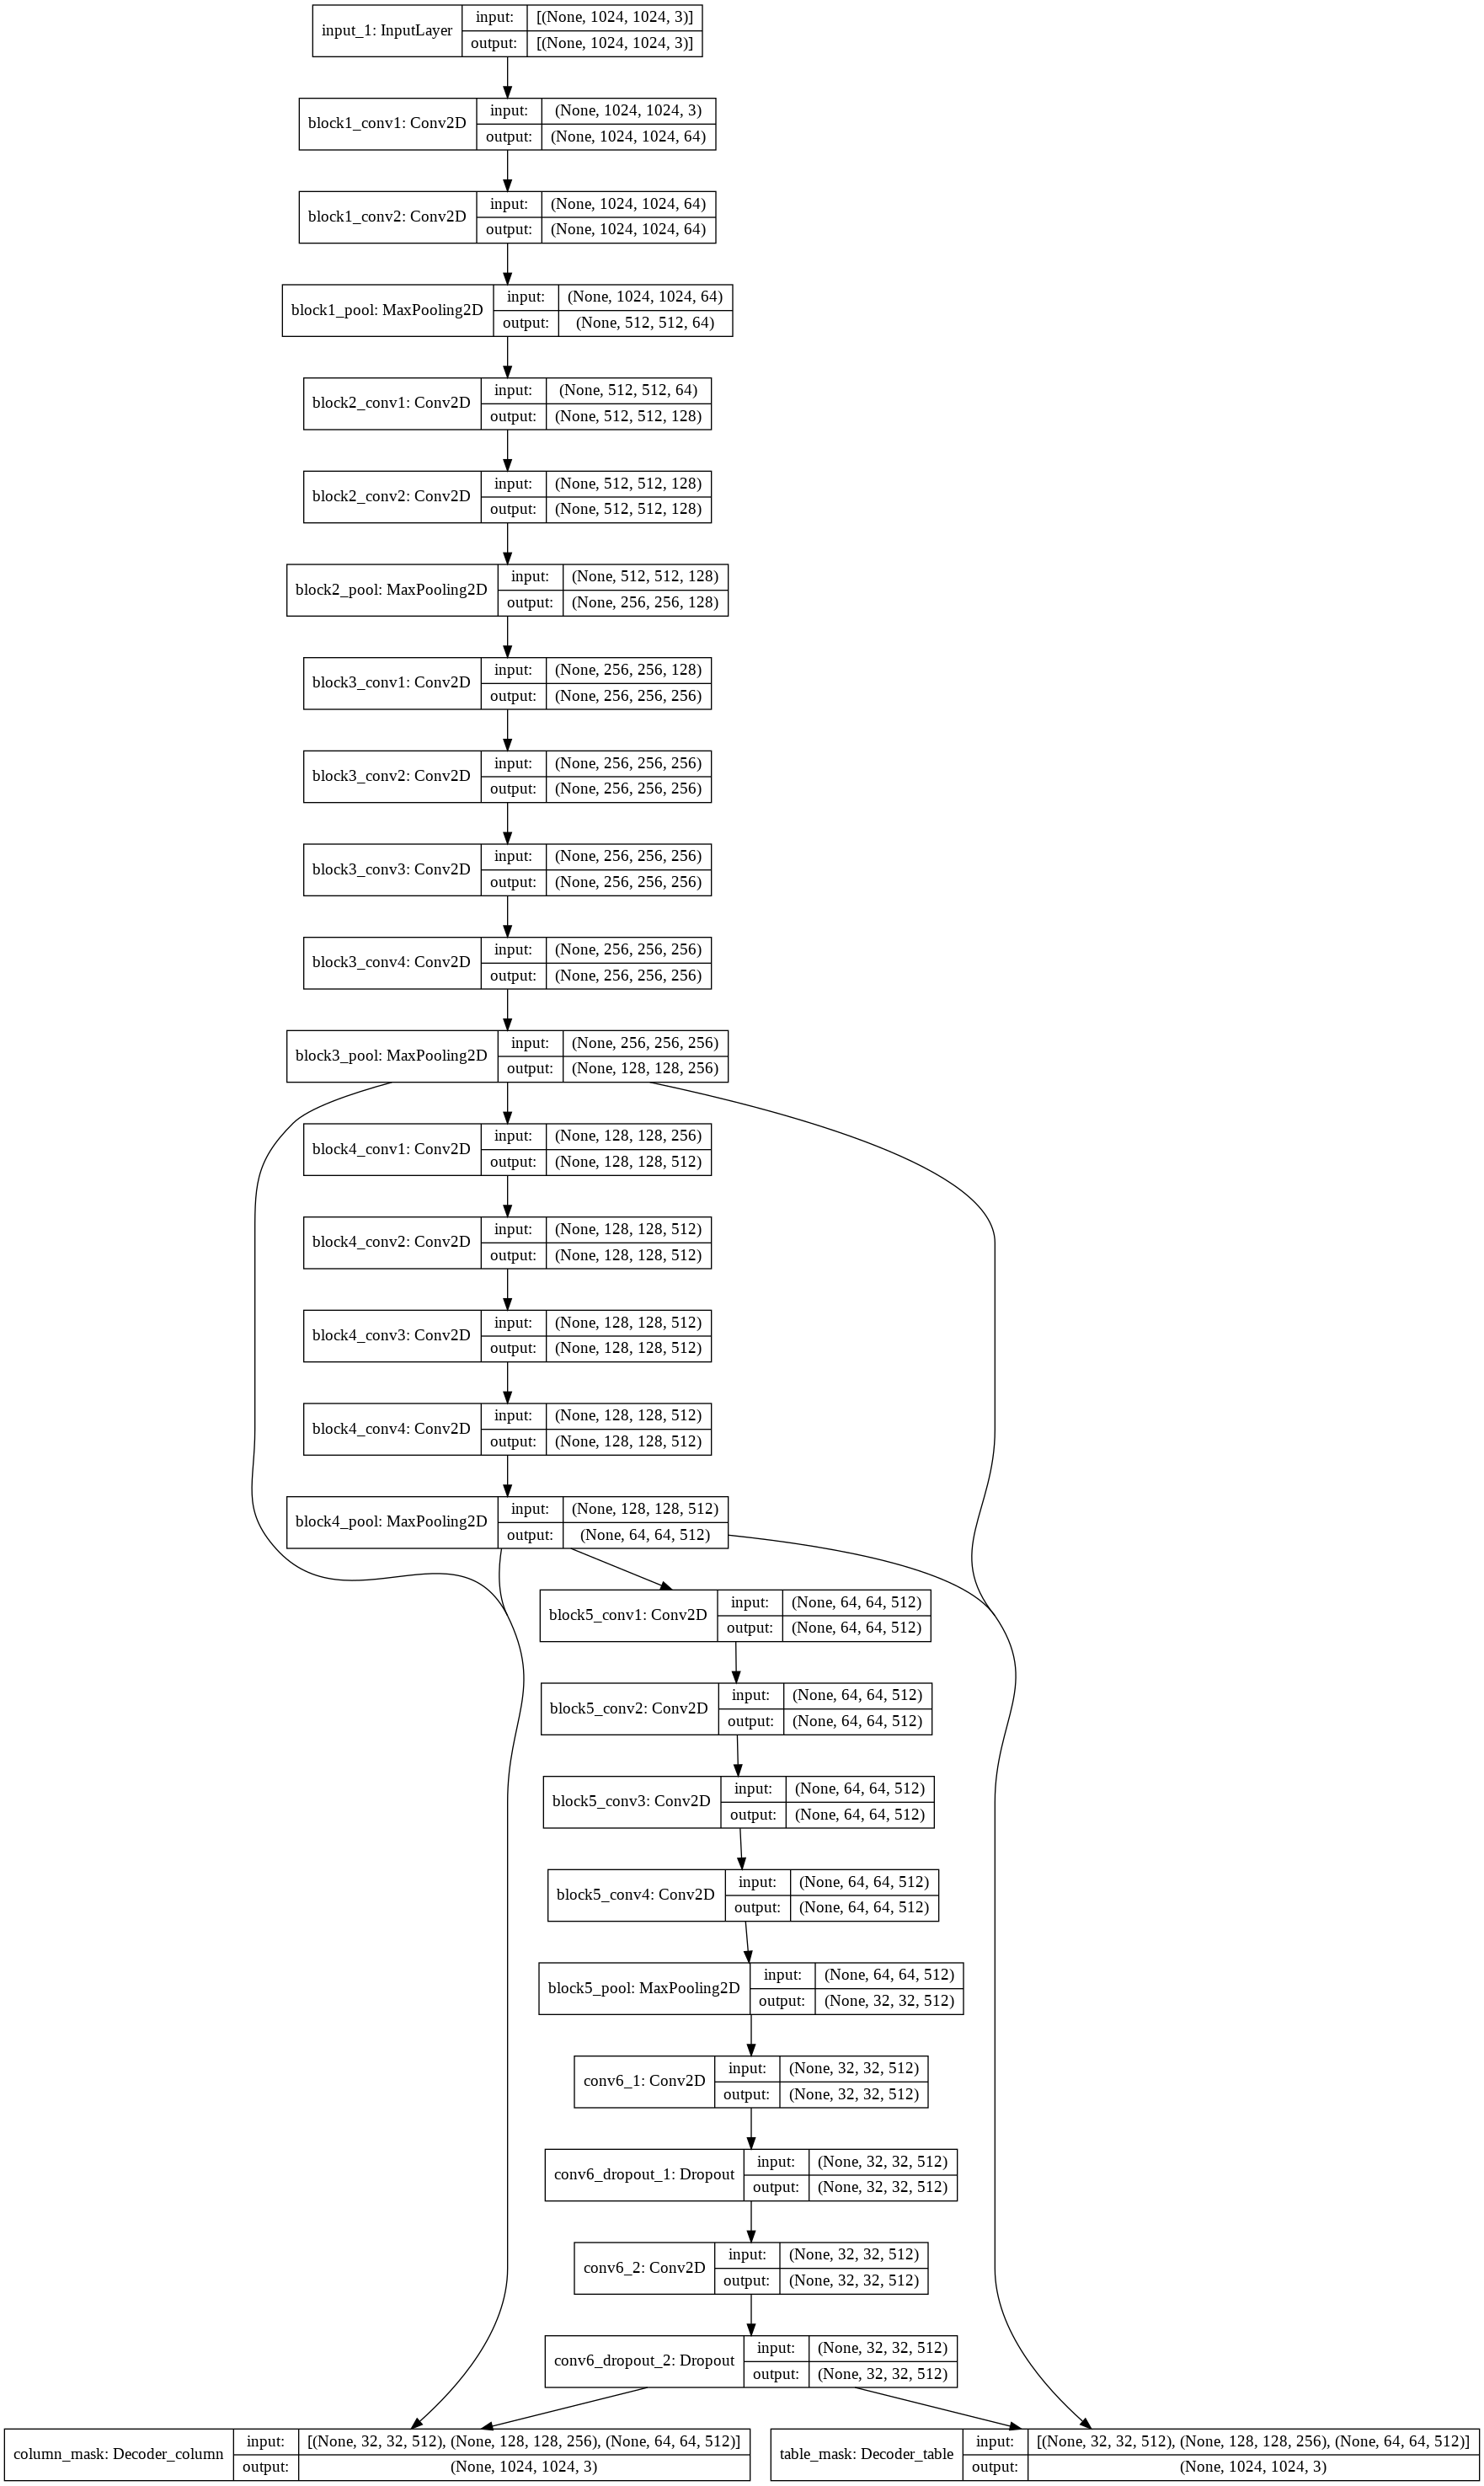

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

<h3>Training the Tablenet model </h3>

In [ ]:
BATCH_S = 4
losses = {
    "table_mask": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    "column_mask": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
}

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=losses,metrics=['accuracy'])

In [ ]:
#with reference: https://www.tensorflow.org/guide/keras/custom_callback
class ChangeLearningRate(tf.keras.callbacks.Callback):

    def __init__(self):
        super(ChangeLearningRate, self).__init__
        self.prev_val_loss = -np.Inf

    def on_epoch_end(self, epoch, logs={}):
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        if (epoch+1) % 10 == 0:
            lr = lr - (lr * 0.02)
        else:
            pass
        if logs['val_loss'] < self.prev_val_loss:
            lr = lr - (lr*0.025)
        else:
            pass
        print('\nLearning rate Changed to:{}'.format(round(lr,4)))
        self.prev_val_loss = logs['val_loss']
        tf.keras.backend.set_value(self.model.optimizer.lr, lr)

In [ ]:
import datetime
lrdecay = ChangeLearningRate()
log_dir="tablenet_vgg19/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
history = model.fit(train_dataset, epochs=50,
                          steps_per_epoch=len(train_resize_paths)//BATCH_S,
                          validation_steps=len(test_resize_paths),
                          validation_data=test_dataset,callbacks=[tensorboard_callback,lrdecay])

Epoch 1/50
111/111 [==============================] - 81s 633ms/step - loss: 1.6569 - table_mask_loss: 0.9369 - column_mask_loss: 0.7200 - table_mask_accuracy: 0.7841 - column_mask_accuracy: 0.8367 - val_loss: 0.5995 - val_table_mask_loss: 0.3331 - val_column_mask_loss: 0.2664 - val_table_mask_accuracy: 0.8685 - val_column_mask_accuracy: 0.8914

Learning rate Changed to:0.001
Epoch 2/50
111/111 [==============================] - 68s 614ms/step - loss: 0.5170 - table_mask_loss: 0.3039 - column_mask_loss: 0.2131 - table_mask_accuracy: 0.8852 - column_mask_accuracy: 0.9085 - val_loss: 0.4121 - val_table_mask_loss: 0.2147 - val_column_mask_loss: 0.1974 - val_table_mask_accuracy: 0.9156 - val_column_mask_accuracy: 0.9139

Learning rate Changed to:0.001
Epoch 3/50
111/111 [==============================] - 68s 609ms/step - loss: 0.4876 - table_mask_loss: 0.2895 - column_mask_loss: 0.1981 - table_mask_accuracy: 0.8856 - column_mask_accuracy: 0.9149 - val_loss: 0.5292 - val_table_mask_loss: 0.

In [ ]:
model.save_weights('tablenet_vgg19_e50.h5')

In [ ]:
log_dir

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir tablenet_vgg19/logs/20210413-053159

In [ ]:
model.load_weights("tablenet_vgg19_e50.h5")

<h3>Predicted Table and Table-column masks </h3>

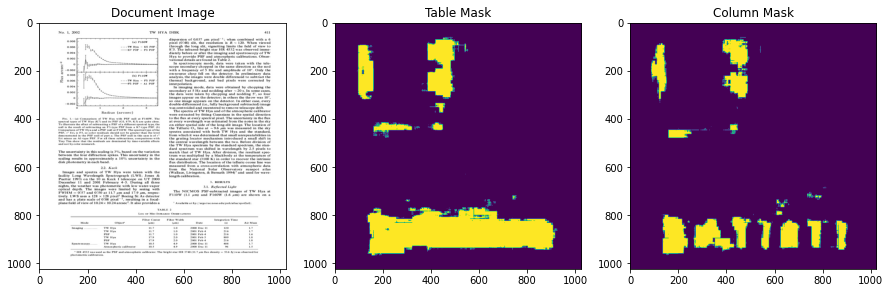

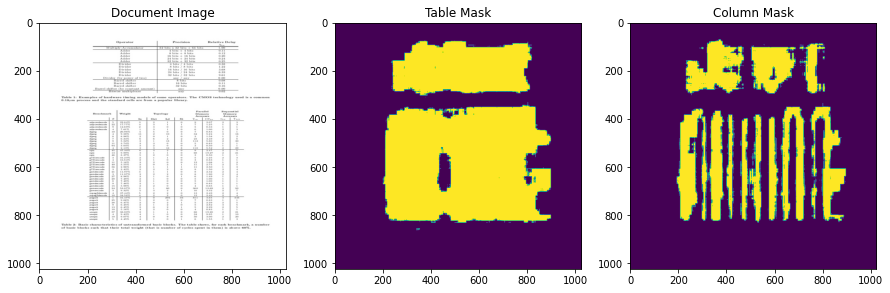

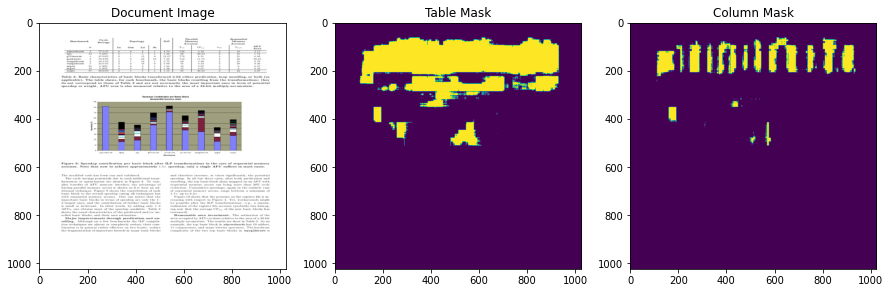

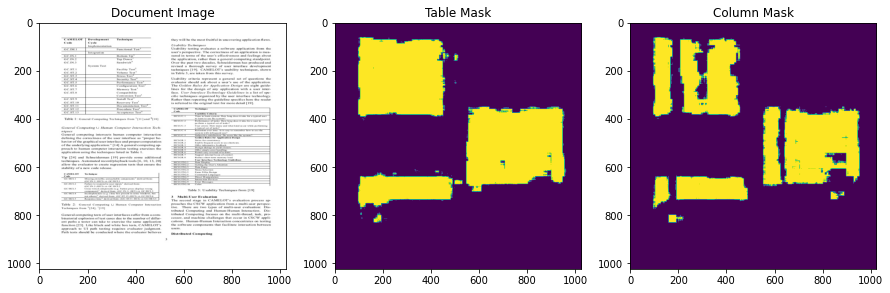

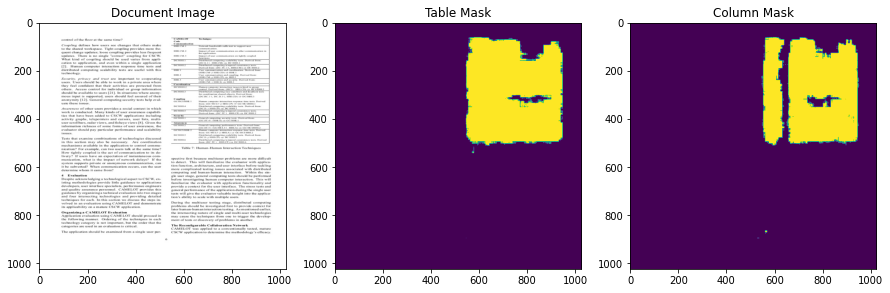

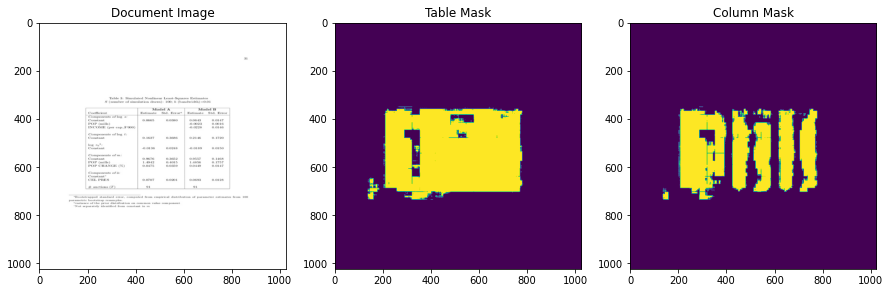

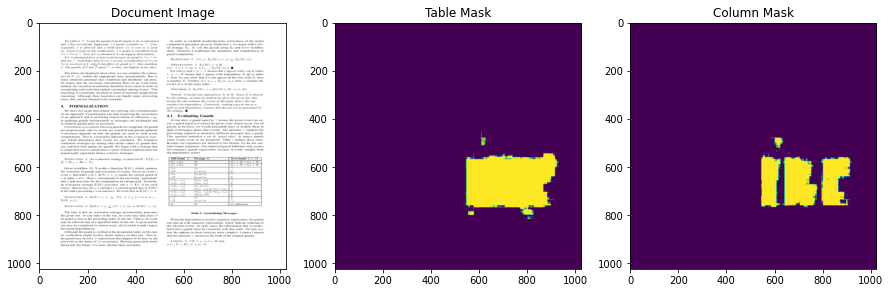

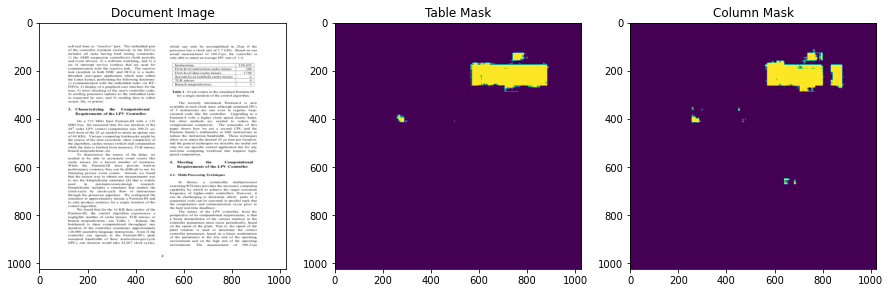

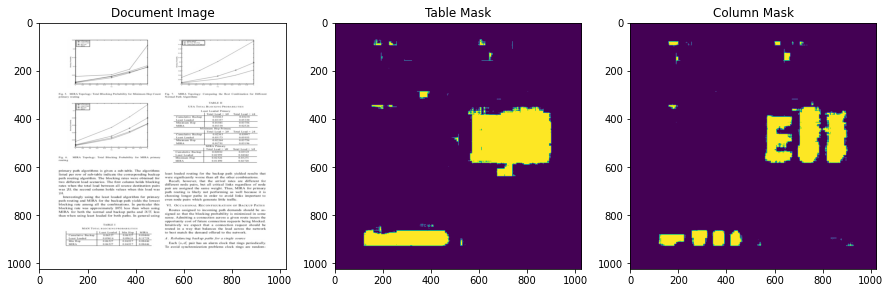

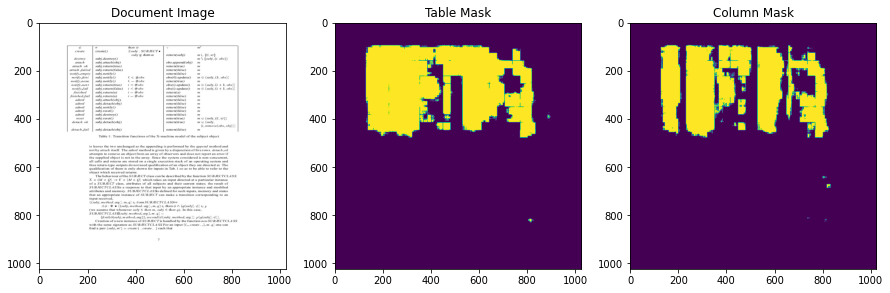

In [ ]:
for image, (tablemask, colmask) in test_dataset.take(10):
    pred_tab, pred_col = model.predict(image)

    pred_tab = tf.argmax(pred_tab, axis=-1)
    pred_tab = pred_tab[..., tf.newaxis]
    
    pred_col = tf.argmax(pred_col, axis=-1)
    pred_col = pred_col[..., tf.newaxis]
  
    table_mask, column_mask = pred_tab[0], pred_col[0]
    plt.figure(figsize=(15, 15))

    title = ['Document Image', 'Table Mask', 'Column Mask']
    plot_img = [image[0], table_mask, column_mask]
    for i in range(len(plot_img)):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(plot_img[i]))
    plt.show()

<h3>Computing Precision, Recall and F1-Score </h3>

In [ ]:
ground_table_mask = []
ground_table_col_mask = []
pred_table_mask = []
pred_tab_col_mask = []
for image, masks in test_dataset:
    ground_table_mask.append(masks['table_mask'])
    ground_table_col_mask.append(masks['column_mask'])

    pred_tab, pred_col = model.predict(image)

    pred_tab = tf.argmax(pred_tab, axis=-1)
    pred_tab = pred_tab[..., tf.newaxis]
    
    pred_col = tf.argmax(pred_col, axis=-1)
    pred_col = pred_col[..., tf.newaxis]
  
    table_mask, column_mask = pred_tab[0], pred_col[0]

    pred_table_mask.append(table_mask)
    pred_tab_col_mask.append(column_mask)

In [ ]:
pred_tabmsk = []
pred_colmsk = []
for tabmsk in pred_table_mask:
    tab_msk = tf.reshape(tabmsk, [1,1024, 1024])
    pred_tabmsk.append(tab_msk)

for colmsk in pred_tab_col_mask:
    col_msk = tf.reshape(colmsk, [1,1024, 1024])
    pred_colmsk.append(col_msk)

In [ ]:
tab_pre = tf.keras.metrics.Precision()
tab_pre.update_state(ground_table_mask, pred_tabmsk)
table_precision = tab_pre.result().numpy()
print('Precision of table mask prediction is: ',table_precision)

Precision of table mask prediction is:  0.9313179


In [ ]:
tab_rec = tf.keras.metrics.Recall()
tab_rec.update_state(ground_table_mask, pred_tabmsk)
table_recall = tab_rec.result().numpy()
print('Recall of table mask prediction is: ',table_recall)

Recall of table mask prediction is:  0.75126874


In [ ]:
print('F1-Score of Table mask predicted is on test dataset is: ',(2 * (table_recall * table_precision))/(table_recall+table_precision))

F1-Score of Table mask predicted is on test dataset is:  0.8316600730026299


In [ ]:
tabcol_pre = tf.keras.metrics.Precision()
tabcol_pre.update_state(ground_table_col_mask, pred_colmsk)
table_col_precision = tabcol_pre.result().numpy()
print('Recall of table_column mask prediction is: ',table_col_precision)

Recall of table_column mask prediction is:  0.8824737


In [ ]:
tabcol_rec = tf.keras.metrics.Recall()
tabcol_rec.update_state(ground_table_col_mask, pred_colmsk)
table_col_recall = tabcol_rec.result().numpy()
print('Recall of table_column mask prediction is: ',table_col_recall)

Recall of table_column mask prediction is:  0.65794843


In [ ]:
print('F1-Score of Table_column mask predicted is on test dataset is: ',(2 * (table_col_recall * table_col_precision))/(table_col_recall+table_col_precision))

F1-Score of Table_column mask predicted is on test dataset is:  0.753848127820481


<h3>Extracting Table information using pytesseract OCR tool </h3>

In [ ]:
%pwd

'/content/drive/My Drive'

In [ ]:
model.load_weights("tablenet_vgg19_e50.h5")

In [ ]:
pip install pytesseract

In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

In [ ]:
import pytesseract
#this method returns information extracted from the image of the document containing table
def text_extraction(image,pred_table_mask,pred_column_mask):
    #original image
    doc_img = tf.keras.preprocessing.image.array_to_img(image[0])
    doc_img = cv2.cvtColor(np.asarray(doc_img), cv2.COLOR_RGB2BGR)
    doc_img = cv2.resize(doc_img, (1024,1024))
    doc_img = Image.fromarray(doc_img)
    #model predicted table mask
    tab_msk = tf.keras.preprocessing.image.array_to_img(pred_table_mask)
    tab_msk = tab_msk.convert('L')
    #adding grayscale table_mask image to the original image to the table portion from the image
    doc_img.putalpha(tab_msk)
    #ref: https://www.analyticsvidhya.com/blog/2020/05/build-your-own-ocr-google-tesseract-opencv/
    config = ('-l eng --oem 1 --psm 3')
    #text extraction using pytesseract
    text = pytesseract.image_to_string(doc_img, config=config)
    return text

In [ ]:
#this method performs the pre-processing steps before predicting the table mask for the image passed as input to the model
def test_preprocess(path_name):
    image_string = tf.io.read_file(path_name)
    image = tf.io.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image  = tf.image.resize(image, [1024, 1024])
    return image

In [ ]:
#preparing the input for the model
def prepare_testdata(files):
    files_list = tf.data.Dataset.list_files(files)
    test_size = len(list(files_list))
    test = files_list.take(test_size)
    BS = 1
    test = test.map(test_preprocess)
    test_dataset = test.batch(BS)
    return test_dataset

In [ ]:
#this method returns csv file of the information extracted from the image of the document containing table
def text_extraction_to_csv(extracted_text,csv_name):
    with open(csv_name, 'w', newline='') as file:
        writer=csv.writer(file)
        extracted_text = extracted_text.lstrip()
        filtered_text = []
        for ele in (extracted_text.split('\n')):
            if ele != '':
                filtered_text.append(ele.split(' '))
        for f_ele in filtered_text:
            data=','.join(f_ele)
            writer.writerow(data.split(','))

In [ ]:
#printing the original image, table_mak and text extracted from the table for the test image
def extreact_csv_plot(test_data,csv_name):
    for image in test_data.take(1):
        pred_tab, pred_col = model.predict(image)
        pred_tab = tf.argmax(pred_tab, axis=-1)
        pred_tab = pred_tab[..., tf.newaxis]
        pred_col = tf.argmax(pred_col, axis=-1)
        pred_col = pred_col[..., tf.newaxis]
        table_mask, column_mask = pred_tab[0], pred_col[0]
        extracted_text = text_extraction(image,table_mask, column_mask)
        plt.figure(figsize=(15, 15))
        title = ['Document Image', 'Table Mask']
        plot_img = [image[0], table_mask]
        for i in range(len(plot_img)):
            plt.subplot(1, 2, i+1)
            plt.title(title[i])
            plt.imshow(tf.keras.preprocessing.image.array_to_img(plot_img[i]))
        plt.show()
        print(extracted_text)
        text_extraction_to_csv(extracted_text,csv_name)

Example 1: Image which has table in middle of the image

created csv file name:  10.1.1.7.2172_4.csv


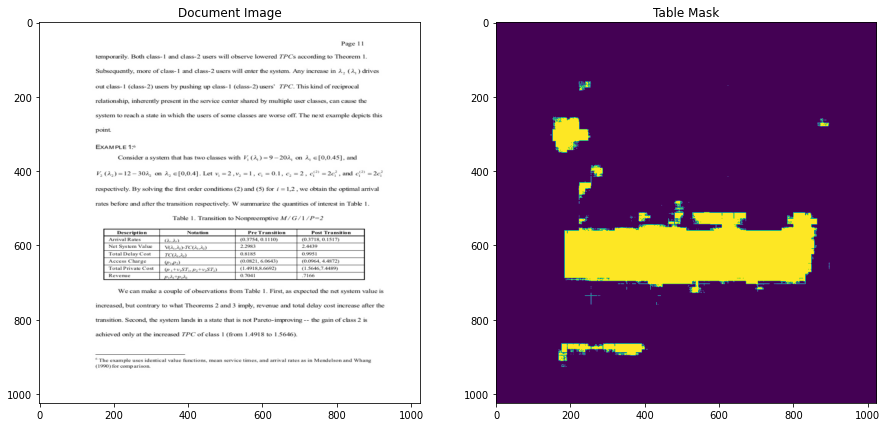

 

 

 

 

    

 

 

 

 

 

 

 

 

 

 

 

XAMT™
30
ay"
ss
ale t . Nonpreemptive Af

Description Notation Pre Transition Post Transit
Arrival Rates Gay (03754, 0.1110) (3718, 0.1517)
Net System Value | V(2,.a)-TCAD 2.2983 2.4439
Total Delay Cost | TCV... O8I8S 0.9951
‘Access Charge wip. (0.0821, 6.0643) (0.0964, 44872)
Total Private Cost_ | (p ,+v.STipstvST) (@A9I88.6692) (SC46,7 4489)
Revenue pasty 0.7081 7166

 

am.



In [ ]:
#chosing one random image from the test_data path and preparing the data for input to the model to predict the table mask for table information extraction
random.seed(4)
csv_name = random.choice(test_resize_paths).split('/')[-1].replace('_resized.jpeg','.csv')
print('created csv file name: ',csv_name)
test_data = prepare_testdata(random.choice(test_resize_paths))
extreact_csv_plot(test_data,csv_name)

Example 2: Image Conatining maximum portion as table

created csv file name:  10.1.1.7.2137_3.csv


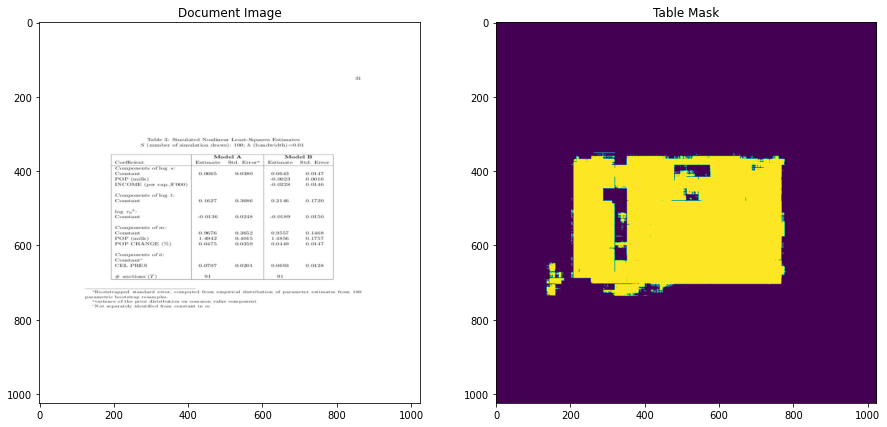

 

cusele A

 

 

 

 

 

 

coefficient Estimate Std. Error®
Somponents of lox

Sonstant 0.0665 wo 0.0643 0.0147
2OP Gnills) 0.0023 0.0016
NCOME (per cap. 0.0228 0.0146
Component

Sonstant 0.1627 686 0.2146 0.1720
to ro®:

Sonstant -0.0136 0.0248 0.0189 0.0150
Components of

Sonstant 0.9676 0.3652 0.9557 0.1468
OP Gnills) 1.4942 0.4015 1.4856 0.1757
>OP CHANGE: (%) 0.0475 0.0359 0.0449 0.0147
Components of

Sonstant®

SEL PRES 0.0707 0.0201 0.0693 0.0128
# auctions (T) 91 91

 

 

 



In [ ]:
#chosing one random image from the test_data path and preparing the data for input to the model to predict the table mask for table information extraction
random.seed(2)
csv_name = random.choice(test_resize_paths).split('/')[-1].replace('_resized.jpeg','.csv')
print('created csv file name: ',csv_name)
test_data = prepare_testdata(random.choice(test_resize_paths))
extreact_csv_plot(test_data,csv_name)

Example:3 Image containing table with lot of text in it.

created csv file name:  10.1.1.8.2160_6.csv


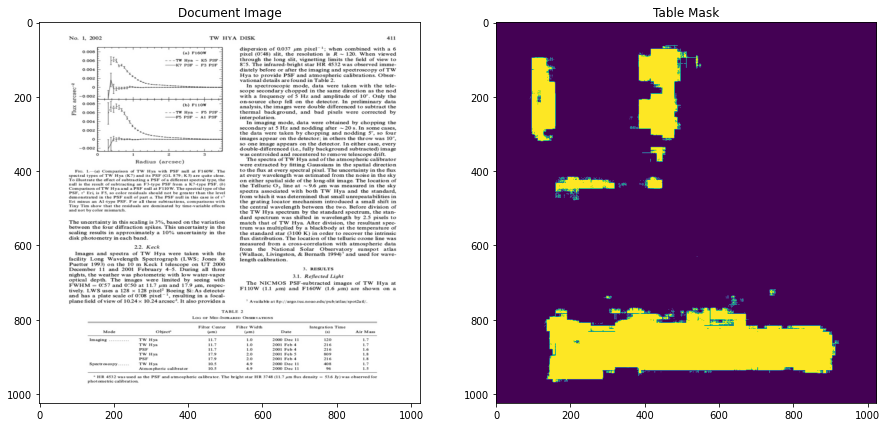

 

 

 

 

 

 

 

 

 

 

 

 

 

_ teow 4
oon Hya — KS PSF :
oer *
0.00:
or enc
9.002
0.008, (@) Friow
0.006 Hye ~ FS PSF
~ + PSF — Al PSF
0.008 :
on .
—L
3
sivet of sunracenng «+ nyecteat
ult of subtracting an Fi-typ 2s 1 R7aype
UW Hygest Bee oh oe
a
Loc a 8:
Filter Center Filter Width Integra: Time
Mode Object" i) (um) Date ° Air Mane
paging TW ya 117 10 2000 Dee 11 120 17
TW Hya m7 10 2001 Feb 4 216 L7
PSF 17 10 2001 Feb 4 216 16
TW Hya 179 20 2001 Feb 09 Ls
PSF 179 20 2001 Feb 4 216 Ls
pectroscopy. TW Hya tos 49 2000 Dee 11 aos uy
Atmosph stor 105 49 2000 Dec 11 sti

“HR 4532 wasused as

 



In [ ]:
#chosing one random image from the test_data path and preparing the data for input to the model to predict the table mask for table information extraction
random.seed(56)
csv_name = random.choice(test_resize_paths).split('/')[-1].replace('_resized.jpeg','.csv')
print('created csv file name: ',csv_name)
test_data = prepare_testdata(random.choice(test_resize_paths))
extreact_csv_plot(test_data,csv_name)

Example 4: Testing on other than Marmot dataset

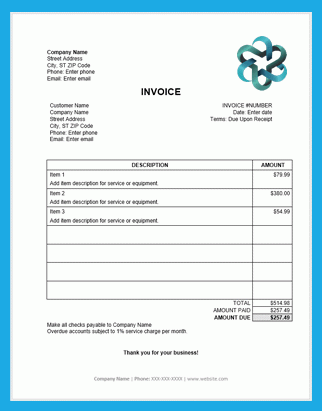

In [ ]:
Image.open('invoicetest.jpeg')

created csv file name:  invoicetest.csv


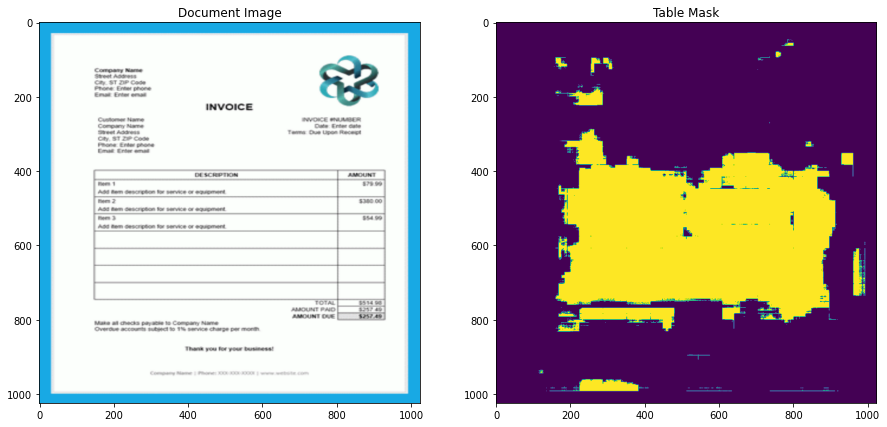

 

 

ee
“<



In [ ]:
#chosing one random image from the test_data path and preparing the data for input to the model to predict the table mask for table information extraction
csv_name = 'invoicetest.csv'
print('created csv file name: ',csv_name)
test_data = prepare_testdata('invoicetest.jpeg')
extreact_csv_plot(test_data,csv_name)

Note: Due to low resolution of the original image we are not able to extract the tablur information. But the model is able to predict the table mask well on the non-marmot data

Observations:

1.   Model is able to generate table masks well for the marmot test dataset.
2.   When the image contains only the table and as well the image containing table with other text for the marmot test data the model is able to generate the table masks.
3.   There is confusion between the table and graph by the model.
4.   Using pytesseract and the predicted table masks we are able to extract the information underlying the table of the image.
5.   Other than the marmot data the model is perfoming okay in generating the table mask. To generalize across the datasets fine tuning of the tablenet model on the different datasets we may be able to generate the table masks accurately.
6.   F1-Score of the table masks for the Marmot test data we achieve is 0.832









<h3>Encoder with ResNet50 as base network initialised with Imagenet weights and takes Input as Document Image</h3>

In [ ]:
X_input = tf.keras.layers.Input(shape=(1024, 1024, 3))
resnet50 = tf.keras.applications.ResNet50(input_tensor=X_input, include_top=False, weights='imagenet',input_shape=(1024,1024,3))
block3 = resnet50.get_layer('conv3_block4_out').output
block4 = resnet50.get_layer('conv4_block6_out').output
block5 = resnet50.get_layer('conv5_block3_out').output

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
#making parameters of pre-trained vgg16 exclusing top layers to non-trainable
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 1030, 1030, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 512, 512, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 512, 512, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
conv6 = tf.keras.layers.Conv2D(512, (1, 1), activation = 'relu', name='conv6_1')(block5)
conv6 = tf.keras.layers.Dropout(0.2, name='conv6_dropout_1')(conv6)

conv6 = tf.keras.layers.Conv2D(512, (1, 1), activation = 'relu', name='conv6_2')(conv6)
conv6 = tf.keras.layers.Dropout(0.2, name='conv6_dropout_2')(conv6)

In [ ]:
table_mask = Decoder_table(kernel=1,filters=[512,256,128,64,3])([conv6,block3,block4])
table_column_mask = Decoder_column(kernel=1,filters=[512,256,128,64,3])([conv6,block3,block4])

In [ ]:
seed(1)
tf.random.set_seed(2)
model2 = tf.keras.Model(inputs=X_input,outputs=[table_mask, table_column_mask],name="Tablenet_Enc_Resnet")

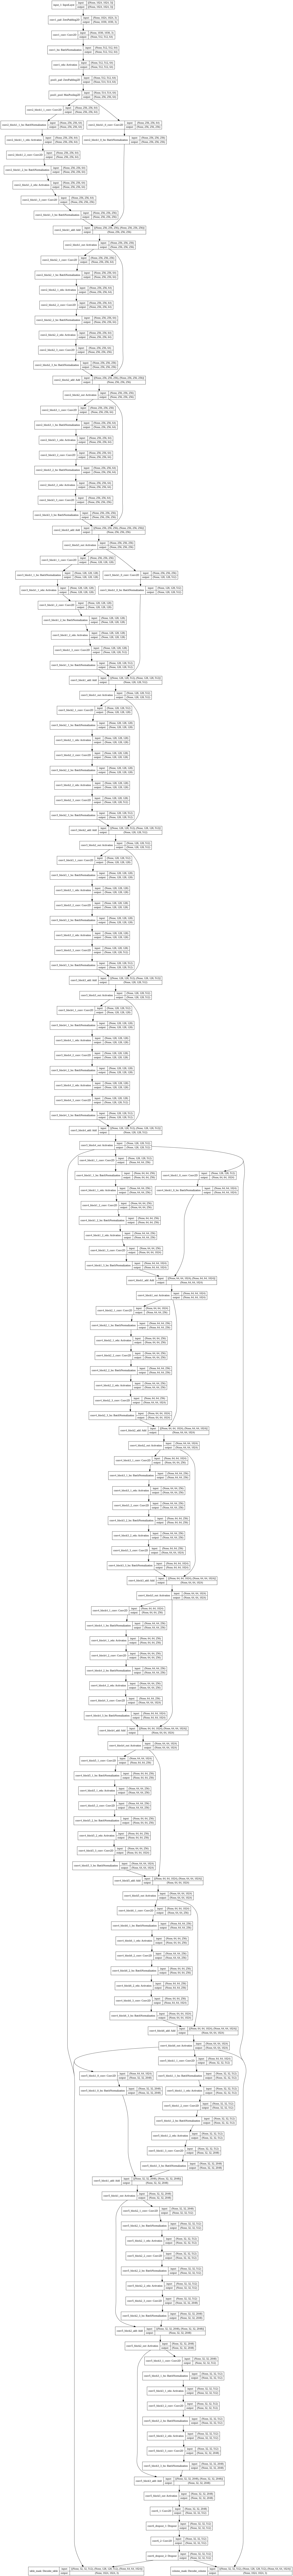

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
BATCH_S = 4
losses = {
    "table_mask": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    "column_mask": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
}

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=losses,metrics=['accuracy'])

In [ ]:
#with reference: https://www.tensorflow.org/guide/keras/custom_callback
class ChangeLearningRate(tf.keras.callbacks.Callback):

    def __init__(self):
        super(ChangeLearningRate, self).__init__
        self.prev_val_loss = -np.Inf

    def on_epoch_end(self, epoch, logs={}):
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        if (epoch+1) % 10 == 0:
            lr = lr - (lr * 0.02)
        else:
            pass
        if logs['val_loss'] < self.prev_val_loss:
            lr = lr - (lr*0.025)
        else:
            pass
        print('\nLearning rate Changed to:{}'.format(round(lr,4)))
        self.prev_val_loss = logs['val_loss']
        tf.keras.backend.set_value(self.model.optimizer.lr, lr)

In [ ]:
import datetime
lrdecay = ChangeLearningRate()
log_dir="tablenet_resnet/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
history = model2.fit(train_dataset, epochs=50,
                          steps_per_epoch=len(train_resize_paths)//BATCH_S,
                          validation_steps=len(test_resize_paths),
                          validation_data=test_dataset,callbacks=[tensorboard_callback,lrdecay])

Epoch 1/50
111/111 [==============================] - 312s 2s/step - loss: 0.9332 - table_mask_loss: 0.5423 - column_mask_loss: 0.3909 - table_mask_accuracy: 0.7427 - column_mask_accuracy: 0.8435 - val_loss: 0.7289 - val_table_mask_loss: 0.3892 - val_column_mask_loss: 0.3397 - val_table_mask_accuracy: 0.8061 - val_column_mask_accuracy: 0.8423

Learning rate Changed to:0.001
Epoch 2/50
111/111 [==============================] - 109s 983ms/step - loss: 0.6715 - table_mask_loss: 0.3749 - column_mask_loss: 0.2966 - table_mask_accuracy: 0.8253 - column_mask_accuracy: 0.8663 - val_loss: 0.6488 - val_table_mask_loss: 0.3335 - val_column_mask_loss: 0.3154 - val_table_mask_accuracy: 0.8418 - val_column_mask_accuracy: 0.8571

Learning rate Changed to:0.001
Epoch 3/50
111/111 [==============================] - 108s 977ms/step - loss: 0.5773 - table_mask_loss: 0.3262 - column_mask_loss: 0.2511 - table_mask_accuracy: 0.8508 - column_mask_accuracy: 0.8790 - val_loss: 0.5710 - val_table_mask_loss: 0.

In [ ]:
model2.save_weights('tablenet_resnet_e50.h5')

In [ ]:
log_dir

'tablenet_resnet/logs/20210418-081014'

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir tablenet_resnet/logs/20210418-081014

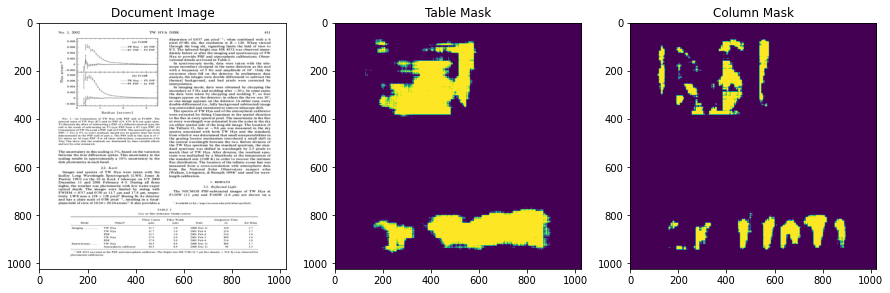

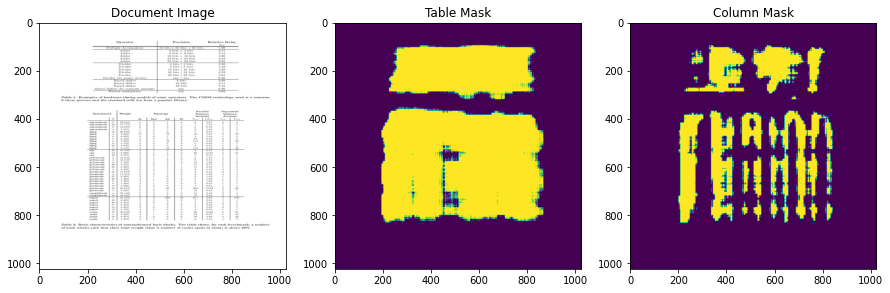

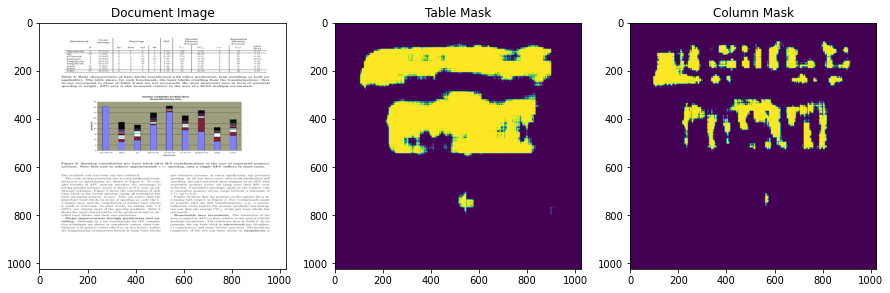

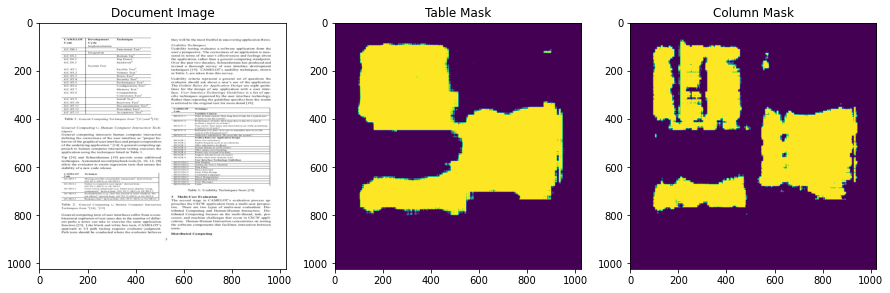

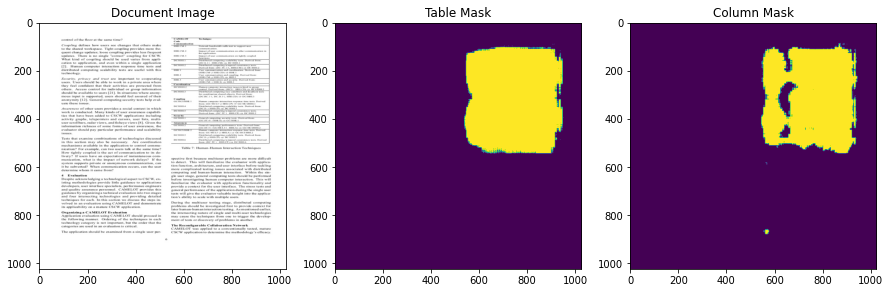

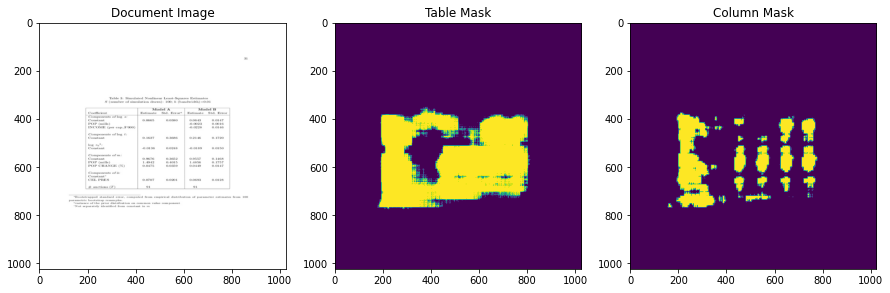

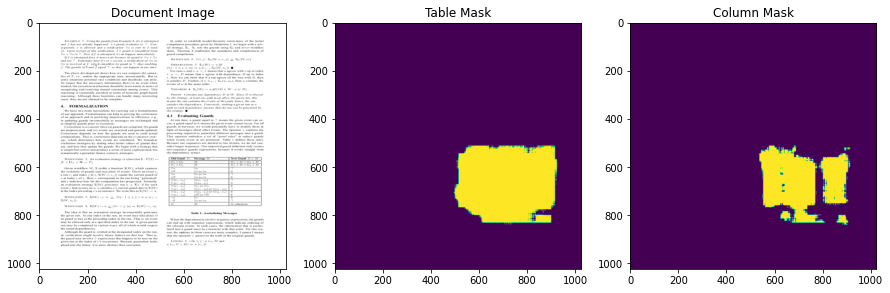

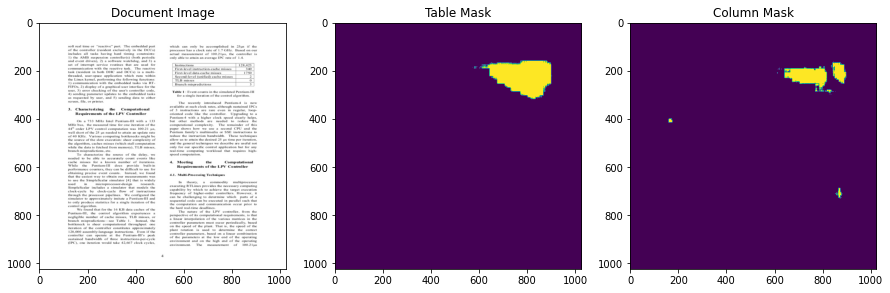

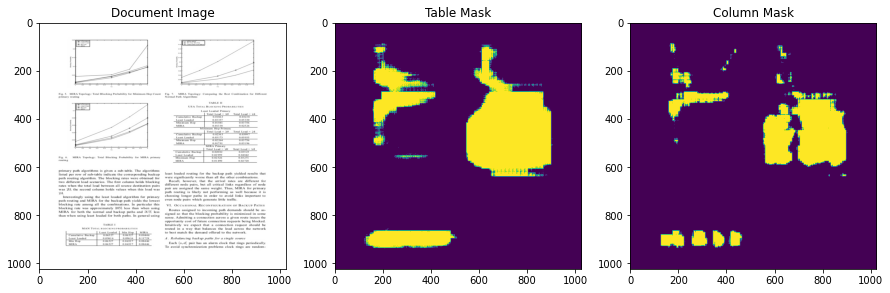

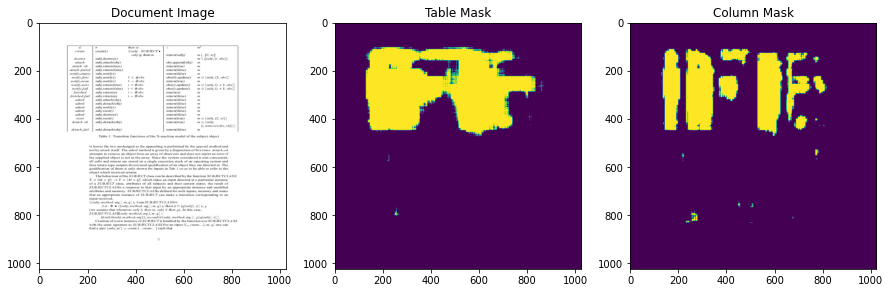

In [ ]:
for image, (tablemask, colmask) in test_dataset.take(10):
    pred_tab, pred_col = model2.predict(image)

    pred_tab = tf.argmax(pred_tab, axis=-1)
    pred_tab = pred_tab[..., tf.newaxis]
    
    pred_col = tf.argmax(pred_col, axis=-1)
    pred_col = pred_col[..., tf.newaxis]
  
    table_mask, column_mask = pred_tab[0], pred_col[0]
    plt.figure(figsize=(15, 15))

    title = ['Document Image', 'Table Mask', 'Column Mask']
    plot_img = [image[0], table_mask, column_mask]
    for i in range(len(plot_img)):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(plot_img[i]))
    plt.show()

In [ ]:
ground_table_mask = []
ground_table_col_mask = []
pred_table_mask = []
pred_tab_col_mask = []
for image, masks in test_dataset:
    ground_table_mask.append(masks['table_mask'])
    ground_table_col_mask.append(masks['column_mask'])

    pred_tab, pred_col = model2.predict(image)

    pred_tab = tf.argmax(pred_tab, axis=-1)
    pred_tab = pred_tab[..., tf.newaxis]
    
    pred_col = tf.argmax(pred_col, axis=-1)
    pred_col = pred_col[..., tf.newaxis]
  
    table_mask, column_mask = pred_tab[0], pred_col[0]

    pred_table_mask.append(table_mask)
    pred_tab_col_mask.append(column_mask)

In [ ]:
pred_tabmsk = []
pred_colmsk = []
for tabmsk in pred_table_mask:
    tab_msk = tf.reshape(tabmsk, [1,1024, 1024])
    pred_tabmsk.append(tab_msk)

for colmsk in pred_tab_col_mask:
    col_msk = tf.reshape(colmsk, [1,1024, 1024])
    pred_colmsk.append(col_msk)

In [ ]:
tab_pre = tf.keras.metrics.Precision()
tab_pre.update_state(ground_table_mask, pred_tabmsk)
table_precision = tab_pre.result().numpy()
print('Precision of table mask prediction is: ',table_precision)

Precision of table mask prediction is:  0.83937114


In [ ]:
tab_rec = tf.keras.metrics.Recall()
tab_rec.update_state(ground_table_mask, pred_tabmsk)
table_recall = tab_rec.result().numpy()
print('Recall of table mask prediction is: ',table_recall)

Recall of table mask prediction is:  0.6559588


In [ ]:
print('F1-Score of Table mask predicted is on test dataset with resnet50 as encoder is: ',(2 * (table_recall * table_precision))/(table_recall+table_precision))

F1-Score of Table mask predicted is on test dataset with resnet50 as encoder is:  0.7364165668027453


In [ ]:
tabcol_pre = tf.keras.metrics.Precision()
tabcol_pre.update_state(ground_table_col_mask, pred_colmsk)
table_col_precision = tabcol_pre.result().numpy()
print('Recall of table_column mask prediction is: ',table_col_precision)

Recall of table_column mask prediction is:  0.81170696


In [ ]:
tabcol_rec = tf.keras.metrics.Recall()
tabcol_rec.update_state(ground_table_col_mask, pred_colmsk)
table_col_recall = tabcol_rec.result().numpy()
print('Recall of table_column mask prediction is: ',table_col_recall)

Recall of table_column mask prediction is:  0.49933577


In [ ]:
print('F1-Score of Table_column mask predicted is on test dataset with resnet50 as encoder is: ',(2 * (table_col_recall * table_col_precision))/(table_col_recall+table_col_precision))

F1-Score of Table_column mask predicted is on test dataset with resnet50 as encoder is:  0.6183083126262068


<h3>Observations:</h3>

*   With encoder architecture as ResNet50 base network initialised with Imagenet weights and decoder kept same as model-1 and trained on Marmot data the performance is not improved significantly.
*   The model with this architecture performs with F1-score to be 0.763 less than 0.832 given by model-1.

